# Using pyobis to to explore OBIS occurrences records
The [Ocean Biodiversity Information System (OBIS)](https://obis.org) is a global open-access data and information clearing-house on marine biodiversity for science, conservation and sustainable development.
OBIS aims to provide world’s largest scientific knowledge base on the diversity, distribution and abundance of all marine organisms in an integrated and standardized format.

In this notebook we will use [`pyobis`](https://github.com/iobis/pyobis) to search occurrence records for ocean sunfish species.

## Installing pyobis

In [1]:
try:
  import pyobis
except:
  !pip install git+https://github.com/iobis/pyobis.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/iobis/pyobis.git to /tmp/pip-req-build-tssa3pol
  Running command git clone -q https://github.com/iobis/pyobis.git /tmp/pip-req-build-tssa3pol
  Created wheel for pyobis: filename=pyobis-1.0.0-py3-none-any.whl size=14876 sha256=3d7fc3ac5aa6a5c2ea4ad5f31e6c70ca6e48e5cc96556e0e54f627646490c174
  Stored in directory: /tmp/pip-ephem-wheel-cache-ip1f_qm9/wheels/15/4e/c5/1970d4803b41b99e306dd86795433089732f219ccecf8fc00c
Successfully built pyobis


Adding other modules

In [20]:
import pandas as pd
import numpy
from pyobis import occurrences as occ
import seaborn as sns
%matplotlib inline

## Grabbing the data
We will first gather some occurrences records for *Mola mola* (Ocean Sunfish) and analyze it before moving on to some more species of sunfishes.

We are going to use `search` function inside the `occurrences` module. We also want to extract `MeausermentOrFact` Records.

In [3]:
res = occ.search(taxonid=127405, mof=True, hasextensions='MeasurementOrFact') # We need to set hasextentions when extracting mof records
df = pd.concat(res)
# df = pd.concat(res) # Since the function returns a list of pandas dataframes when mof=True, we would concat all those dataframes into one
df # Let's preview the data we acquired

,infraphylum,date_year,scientificNameID,year,scientificName_x,dropped,gigaclassid,aphiaID,language,decimalLatitude,...,occurrenceID_y,measurementUnit,measurementDeterminedDate,measurementType,measurementUnitID,measurementTypeID,measurementID,measurementMethod,scientificName_y,eventDate_y
0,Gnathostomata,1999,urn:lsid:marinespecies.org:taxname:127405,1999,Mola mola,False,10194,127405,en,57.007167,...,DASSHDT00000002_SE_1459_127405,None,None,taxon abundance: count,None,http://vocab.nerc.ac.uk/collection/P01/current...,DASSHDT00000002_SE_1459_127405_count,None,Mola mola,1999-09-04
1,Gnathostomata,2013,urn:lsid:marinespecies.org:taxname:127405,2013,Mola mola,False,10194,127405,NaN,28.092900,...,diveboard:69119_213810_0,None,None,Sampling instrument,None,http://vocab.nerc.ac.uk/collection/Q01/current...,None,None,Mola mola,2013-06-06T13:46:00
2,Gnathostomata,2003,urn:lsid:marinespecies.org:taxname:127405,2003,Mola mola,False,10194,127405,en,50.080171,...,DASSHDT00000002_SE_1722_127405,None,None,taxon abundance: count,None,http://vocab.nerc.ac.uk/collection/P01/current...,DASSHDT00000002_SE_1722_127405_count,None,Mola mola,2003-08-24
3,Gnathostomata,2008,urn:lsid:marinespecies.org:taxname:127405,2008,Mola mola,False,10194,127405,en,52.787267,...,DASSHDT00000002_SE_1934_127405,None,None,taxon abundance: count,None,http://vocab.nerc.ac.uk/collection/P01/current...,DASSHDT00000002_SE_1934_127405_count,None,Mola mola,2008-01-14
4,Gnathostomata,2003,urn:lsid:marinespecies.org:taxname:127405,2003,Mola mola,False,10194,127405,en,50.286883,...,DASSHDT00000002_SE_1689_127405,None,None,taxon abundance: count,None,http://vocab.nerc.ac.uk/collection/P01/current...,DASSHDT00000002_SE_1689_127405_count,None,Mola mola,2003-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Gnathostomata,1995,urn:lsid:marinespecies.org:taxname:127405,1995,Mola mola,False,10194,127405,en,55.265840,...,None,None,None,geometry,None,None,194894,None,Mola mola,1995-07-26T12:39:12
134,Gnathostomata,1995,urn:lsid:marinespecies.org:taxname:127405,1995,Mola mola,False,10194,127405,en,55.265840,...,None,None,None,originalcoordinates,None,None,194893,None,Mola mola,1995-07-26T12:39:12
135,Gnathostomata,1995,urn:lsid:marinespecies.org:taxname:127405,1995,Mola mola,False,10194,127405,en,55.265840,...,None,None,None,primarylatitude,None,None,194891,None,Mola mola,1995-07-26T12:39:12
136,Gnathostomata,1995,urn:lsid:marinespecies.org:taxname:127405,1995,Mola mola,False,10194,127405,en,55.265840,...,None,None,None,primarylongitude,None,None,194892,None,Mola mola,1995-07-26T12:39:12


Now that we have got our data let's see the specifics.
+ We have got 138 rows of data for just *Mola mola*.
+ There are numerous columns like `scientificName`, `year`, `infraphylum`, `class`, `kingdom`, etc,. more information about which can be found at [OBIS](https://obis.org)

Let us begin by plotting the number of occurrence records that have been recorded for *Mola mola* in particular over years. We will investigate this data plotting a `countplot` (*we are using `seaborn` since it is pretty easy to use and yields some very nice plots*) for the number of records v/s year of taking the record.

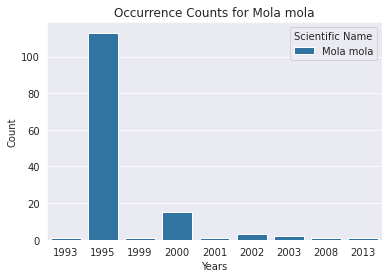

In [4]:
df = df.sort_values(by='year') # We will sort the data according to year
sns.set_style("darkgrid")
p = sns.countplot(data=df,x='year',hue='scientificName_x')
p.set_xlabel("Years")
p.set_ylabel("Count")
p.set_title("Occurrence Counts for Mola mola")
p.legend(title='Scientific Name', labels=['Mola mola']);

We can see that the highest number of records were taken in the year 1995, which is great but since the number of records have substantially declined. There can be two possibilities:
+ Sampling efforts have not taken place much after 1995 (though there's some spike in the year 2000) this is dangerous because we might not be doing enough to monitor their population
+ If sampling efforts have taken place, then we couldn't find much numbers which is even alarming. 

----
**Now, let's get some more sunfishes, other than Mola mola.**

We will first query for these 7 sunfish species because they are the very common, and we'll likely find some worthy data on them.

In [5]:
sunfishes = [
  'Lepomis cyanellus',
  'Mola mola',
  'Lepomis megalotis',
  'Acantharchus pomotis',
  'Lepomis gibbosus',
  'Lepomis auritus',
  'Lepomis microlophus',
]

But we still need to check whether we have occurrence records for them or not.

In [6]:
hasRecords=[]
for i in sunfishes:
  data = pd.DataFrame(occ.search(scientificname=i)['results'])
  if(len(data)>0):
    hasRecords.append(i)
    print("Records for {} -> family {}, class {}".format(data.scientificName[0],data.family[0],data.loc[0,'class']))

Records for Mola mola -> family Molidae, class Actinopteri
Records for Lepomis gibbosus -> family Centrarchidae, class Actinopteri


In [7]:
hasRecords # The species which have got records are

['Mola mola', 'Lepomis gibbosus']

We can see that out of 7 sunfishes we queried, records exist for only 2. 
+ Records exist only for *Mola mola* and *Lepomis gibbosus*.
+ Records do not exist for *Lepomis cyanellus*,*Lepomis megalotis*, *Acantharchus pomotis*, *Lepomis auritus*, *Lepomis microlophus*.

Now that we have decided which species we want the data of, let's grab that data and merge it into one single `pandas` DataFrame.

In [8]:
_df = pd.DataFrame(columns=df.columns)
_df
for j in hasRecords:
  data = pd.concat(occ.search(scientificname=j,mof=True,hasextensions='MeasurementOrFact'))
  _df = pd.concat([_df,data])
_df

,infraphylum,date_year,scientificNameID,year,scientificName_x,dropped,gigaclassid,aphiaID,language,decimalLatitude,...,scientificName_y,eventDate_y,type,license,ownerInstitutionCode,samplingEffort,taxonRank,wrims,taxonomicStatus,lifeStage
0,Gnathostomata,1999,urn:lsid:marinespecies.org:taxname:127405,1999,Mola mola,False,10194,127405,en,57.007167,...,Mola mola,1999-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gnathostomata,2013,urn:lsid:marinespecies.org:taxname:127405,2013,Mola mola,False,10194,127405,NaN,28.092900,...,Mola mola,2013-06-06T13:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gnathostomata,2003,urn:lsid:marinespecies.org:taxname:127405,2003,Mola mola,False,10194,127405,en,50.080171,...,Mola mola,2003-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gnathostomata,2008,urn:lsid:marinespecies.org:taxname:127405,2008,Mola mola,False,10194,127405,en,52.787267,...,Mola mola,2008-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gnathostomata,2003,urn:lsid:marinespecies.org:taxname:127405,2003,Mola mola,False,10194,127405,en,50.286883,...,Mola mola,2003-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Gnathostomata,1991,ITIS:TSN:168144,1991,Lepomis gibbosus,False,10194,151290,en,46.628900,...,Lepomis gibbosus,1991-07-24,Event,http://creativecommons.org/publicdomain/zero/1...,USGS,Tow time 10 minutes:Speed 1000 RPM :39' Otter...,Species,True,valid,NA
8,Gnathostomata,1991,ITIS:TSN:168144,1991,Lepomis gibbosus,False,10194,151290,en,46.628900,...,Lepomis gibbosus,1991-07-24,Event,http://creativecommons.org/publicdomain/zero/1...,USGS,Tow time 10 minutes:Speed 1000 RPM :39' Otter...,Species,True,valid,NA
9,Gnathostomata,1998,ITIS:TSN:168144,1998,Lepomis gibbosus,False,10194,151290,en,46.721900,...,Lepomis gibbosus,1998-04-28,Event,http://creativecommons.org/publicdomain/zero/1...,USGS,Tow time 5 minutes:Speed 1300 RPM :18' Bottom...,Species,True,valid,NA
10,Gnathostomata,1998,ITIS:TSN:168144,1998,Lepomis gibbosus,False,10194,151290,en,46.721900,...,Lepomis gibbosus,1998-04-28,Event,http://creativecommons.org/publicdomain/zero/1...,USGS,Tow time 5 minutes:Speed 1300 RPM :18' Bottom...,Species,True,valid,NA


We will again plot the `countplot` we plotted against only *Mola mola* now with both of them together. This will help us examine if only one particular species had its records going south, or something's wrong with every species.

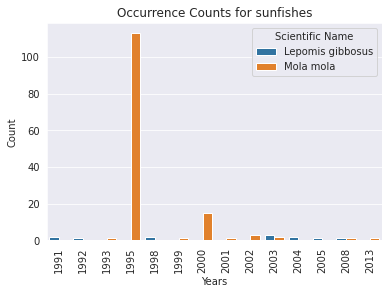

In [9]:
_df = _df.sort_values(by='year') # We will sort the data according to year
sns.set_style("darkgrid")
p = sns.countplot(data=_df,x='year',hue='scientificName_x')
p.set_xlabel("Years")
p.set_xticklabels(_df.year.unique(),rotation=90)
p.set_ylabel("Count")
p.set_title("Occurrence Counts for sunfishes")
p.legend(title='Scientific Name');

We can see that *Lepomis Gibbosus* has barely got any occurrence records in comparison to *Mola mola*. Post 2000s, there has been very less data pertaining to these two species, which is really alarming.

Let us dig deeper and zoom into the numbers after 2000.

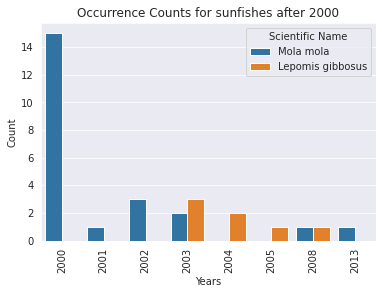

In [10]:
_df = _df[_df["year"].astype(int)>=2000].sort_values(by='year') # We will visualize data only post 2000.
sns.set_style("darkgrid")
p = sns.countplot(data=_df,x='year',hue='scientificName_x')
p.set_xlabel("Years")
p.set_xticklabels(_df.year.unique(),rotation=90)
p.set_ylabel("Count")
p.set_title("Occurrence Counts for sunfishes after 2000")
p.legend(title='Scientific Name');


We can see that *Lepomis gibbosus* has got more sampling 2003 onwards (the last records we found were from 2008.) While for *Mola mola*, we had some great numbers in sampling efforts before 2003 and after this we could get only scarce records. **This is alarming**, maybe because their numbers may have went down significantly.

> *If you are interested*, This National Geographics [article](https://www.nationalgeographic.com/animals/fish/facts/ocean-sunfish) claims that *Mola*s are already vunerable and can die due to plastic waste. So, take steps forward and consume as much less plastic as you can. Thank you!



**Plotting records on a world map**

Now let us plot the records we have received so far on a world map. With `plotly` we can plot a geoplot easily.

Before this we will need to grab data about coordinates of occurrence records.

In [11]:
import plotly.graph_objects as go
import plotly.express as px

In [12]:
res = pd.DataFrame(columns=["longitude","latitude","scientificName"])
for i in hasRecords:
  data = occ.getpoints(scientificname=i)["coordinates"]
  data = pd.DataFrame(data)
  data.columns=['longitude','latitude']
  data['scientificName'] = i
  res = pd.concat([res,data])

In [21]:
orthographic=0
fig = px.scatter_geo(res,lat="latitude", lon="longitude", hover_name="scientificName")
fig.update_layout(height=400, margin={"r":0,"t":40,"l":0,"b":10}, title="World map for ocean sunfish species")
if (orthographic):
  fig.update_geos(projection_type="orthographic") # for a round earth
fig.show();

The above map might not be visible in a Jupyter Notebook once the kernel is shut. So using IPython display we can view it easily.

In [23]:
from IPython.display import display
display(fig)

We can see that these two species of sunfish are mostly found in the nothern hemisphere waters. There is a strong possibility that the sampling efforts in those regions have been stronger than other places.

Before we move on, let us see a heatmap of these species that will help us know where are they in good numbers.

In [14]:
fig = go.Figure(go.Densitymapbox(lat=res.latitude, lon=res.longitude,
                                 radius=5))
fig.update_layout(mapbox_style='open-street-map', mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Now let us investigate their migration patterns.

In [15]:
from palettable.cartocolors.qualitative import Bold_6
from shapely.geometry import MultiPoint
import folium

In [16]:
m = folium.Map(location=[0,0],zoom_start=2)

In [17]:
colors = {s: c for s, c in zip(hasRecords, Bold_6.hex_colors)}
style_function = lambda color: (
    lambda feature: dict(color=color, weight=2, opacity=0.6)
)


for sunfish in hasRecords:
    df = res.loc[res["scientificName"] == sunfish]
    positions = MultiPoint(data[["longitude","latitude"]].values)
    folium.GeoJson(
        positions.__geo_interface__,
        name=sunfish,
        tooltip=sunfish,
        style_function=style_function(color=colors[sunfish]),
    ).add_to(m)

m.fit_bounds(m.get_bounds())
folium.LayerControl().add_to(m)

m